–°–Ω–∞—á–∞–ª–∞ –∑–∞–ø—É—Å–∫–∞–µ–º —Ñ—É–Ω–∫—Ü–∏—é –≤—ã–≥—Ä—É–∂–µ–Ω–∏—è –ø–∞–º—è—Ç–∏ —Å –≤–∏–¥–µ–æ–∫–∞—Ä—Ç—ã, –∏–Ω–∞—á–µ –º–æ–∂–Ω–æ –∑–∞–±—ã—Ç—å –≤—ã–≥—Ä—É–∑–∏—Ç—å –º–æ–¥–µ–ª—å –∏–ª–∏ –ø–∞—Ä–∞–ª–µ–ª–ª—å–Ω–æ –∏–º–µ—Ç—å –∑–∞–≥—Ä—É–∂–µ–Ω–Ω—ã–π –Ω–æ—É—Ç–±—É–∫. –ò–Ω–æ–≥–¥–∞ –≤ —Ç–∞–∫–∏—Ö —Å–ª—É—á–∞—è—Ö –µ—ë –Ω–µ —Ö–≤–∞—Ç–∞–µ—Ç, –∏ –≤—Å–µ –∑–∞–≤–∏—Å–∞–µ—Ç.

In [1]:
import torch
with torch.no_grad():
    torch.cuda.empty_cache()

–ó–∞–≥—Ä—É–∂–∞–µ–º –≤—Å–µ –±–∏–±–ª–∏–æ—Ç–µ–∫–∏ –∑–∞ –æ–¥–∏–Ω —Ä–∞–∑, –∫–æ—Ç–æ—Ä—ã–µ –∏—Å–ø–æ–ª—å–∑—É—é—Ç—Å—è.

In [2]:
import numpy as np
import pandas as pd
import torchaudio
import os
import sys
import torchaudio
import librosa
import IPython.display as ipd
import transformers
import torch
import torch.nn  as nn
import torch.nn.functional as F
import torchaudio
import random
import wandb
import matplotlib.pyplot as plt

from pathlib import Path
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from datasets import load_dataset, load_metric
from transformers import AutoConfig, Wav2Vec2Processor
from dataclasses import dataclass
from typing import Optional, Tuple
from transformers.file_utils import ModelOutput
from torch.nn import BCEWithLogitsLoss, CrossEntropyLoss, MSELoss
from typing import Dict, List, Optional, Union
from transformers import EvalPrediction
from transformers import TrainingArguments
from transformers import Trainer
from sklearn.metrics import classification_report
from IPython.display import Audio, display
from datasets import Dataset
from transformers.models.wav2vec2.modeling_wav2vec2 import Wav2Vec2PreTrainedModel
from transformers.models.wav2vec2.modeling_wav2vec2 import Wav2Vec2Model


/usr/lib/python3/dist-packages/requests/__init__.py:87: RequestsDependencyWarning: urllib3 (2.1.0) or chardet (4.0.0) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "


In [3]:
wandb.login()

/usr/lib/python3/dist-packages/requests/__init__.py:87: RequestsDependencyWarning: urllib3 (2.1.0) or chardet (4.0.0) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "
wandb: Currently logged in as: kameshmihail (thpmihail). Use `wandb login --relogin` to force relogin


True

In [4]:
os.environ["WANDB_PROJECT"]="english_accent_classifier_test"

–î–∞—Ç–∞—Å–µ—Ç —Å–æ—Ä—Ç–∏—Ä–æ–≤–∞–Ω –ø–æ –ø–∞–ø–∫–∞–º, –Ω–∞–∏–º–µ–Ω–æ–≤–∞–Ω–∏–µ –∫–æ—Ç–æ—Ä—ã—Ö —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤—É–µ—Ç —Ç–∏–ø—É –∞–∫—Ü–µ–Ω—Ç–∞, –ø–æ –∫–æ—Ç–æ—Ä–æ–º—É –∏–¥–µ—Ç –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏—è. –î–ª—è —Å–æ–∑–¥–∞–Ω–∏—è –¥–∞—Ç–∞—Å–µ—Ç–∞ —Å–Ω–∞—á–∞–ª–∞ –∏–Ω–∏—Ü–∏–∞–ª–∏–∑–∏—Ä—É–µ–º –ø—É—Å—Ç–æ–π 3 –º–µ—Ä–Ω—ã–π —Å–ø–∏—Å–æ–∫ –∏ –∑–∞–ø–æ–ª–Ω–∏–º –µ–≥–æ. –ö–∞–∂–¥–æ–º—É –∏–Ω–¥–µ–∫—Å—É —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤—É–µ—Ç –Ω–∞–∑–≤–∞–Ω–∏–µ —Ñ–∞–π–ª–∞, –µ–≥–æ –ø—É—Ç—å, –∫–æ—Ç–æ—Ä—ã–π –º–æ–∂–Ω–æ –ø–æ—Ç–æ–º –±—É–¥–µ—Ç –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å –¥–ª—è –∑–∞–≥—Ä—É–∑–∫–∏ —Ñ–∞–π–ª–∞ —á–µ—Ä–µ–∑ –±–∏–±–ª–∏–æ—Ç–µ–∫–∏ –∏ —Å–∞–º –∞–∫—Ü–µ–Ω—Ç.

In [5]:
dataset = []

for x in tqdm(Path("/home/thp/diplom/audio/").glob("**/*.wav")):
    file = str(x).split('/')[-1].split('.')[0]
    label = str(x).split('/')[-2]
    dataset.append({
            "file_name": file,
            "path_to_file": x,
            "accent": label
        })

9646it [00:00, 40964.33it/s]


–ö–æ–Ω–≤–µ—Ä—Ç–∏—Ä—É–µ–º –ø–æ–ª—É—á–µ–Ω–Ω—ã–π —Å–ø–∏—Å–æ–∫ –≤ Pandas.

In [6]:
df = pd.DataFrame(dataset)
dataset = []
df.head()

file_name                                     path_to_file   accent
0  mandarin15_7  /home/thp/diplom/audio/chinese/mandarin15_7.wav  chinese
1  cantonese4_7  /home/thp/diplom/audio/chinese/cantonese4_7.wav  chinese
2  mandarin26_3  /home/thp/diplom/audio/chinese/mandarin26_3.wav  chinese
3  mandarin31_4  /home/thp/diplom/audio/chinese/mandarin31_4.wav  chinese
4         wu2_4         /home/thp/diplom/audio/chinese/wu2_4.wav  chinese

–î–ª—è –≤–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏–∏ –ø–æ—Å–º–æ—Ç—Ä–∏–º —Å–∫–æ–ª—å–∫–æ –∞–∫—Ü–µ–Ω—Ç–æ–≤ –∫–∞–∂–¥–æ–≥–æ —Ç–∏–ø–∞.

In [7]:
print("Labels: ", df["accent"].unique())
print()
df.groupby("accent").count()[["path_to_file"]]

Labels:  ['chinese' 'slavic' 'spanish' 'semitic' 'english' 'indoiranian']



path_to_file
accent                   
chinese              1568
english              1680
indoiranian          1414
semitic              1687
slavic               1610
spanish              1687

<BarContainer object of 6 artists>

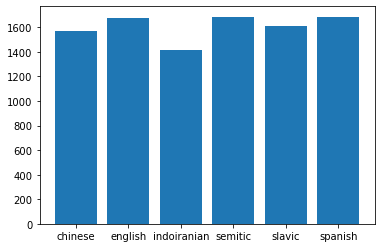

In [8]:
plt.bar(*np.unique(df["accent"], return_counts=True))

–†–∞–∑–¥–µ–ª–∏–º –¥–∞—Ç–∞—Å–µ—Ç –Ω–∞ 3 —á–∞—Å—Ç–∏ - train / validation / test –≤ –ø—Ä–æ–ø–æ—Ä—Ü–∏—è—Ö 70%/15%/15% —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤–µ–Ω–Ω–æ.

In [9]:
train, validation, test = np.split(df.sample(frac=1), [int(.7*len(df)), int(.85*len(df))])

/home/thp/.local/lib/python3.10/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


–ü–æ—Å–º–æ—Ç—Ä–∏–º –ø–æ–ª—É—á–∏–≤—à—É—é—Å—è –∏—Ö —Ä–∞–∑–º–µ—Ä–Ω–æ—Å—Ç—å.

In [10]:
print(train.shape)
print(validation.shape)
print(test.shape)

(6752, 3)
(1447, 3)
(1447, 3)


–û–±–Ω—É–ª–∏–º –∏–Ω–¥–µ–∫—Å—ã, —á—Ç–æ–±—ã –æ–Ω–∏ —à–ª–∏ –ø–æ –ø–æ—Ä—è–¥–∫—É. –°–µ–π—á–∞—Å –æ–Ω–∏ –Ω–µ—Å–∫–æ–ª—å–∫–æ —Å–ª–æ–º–∞–Ω—ã –ø–æ—Å–ª–µ —Ä–∞–∑–±–∏–µ–Ω–∏—è –¥–∞—Ç—ã –Ω–∞ 3 —á–∞—Å—Ç–∏.

In [11]:
train = train.reset_index(drop=True)
validation = validation.reset_index(drop=True)
test = test.reset_index(drop=True)

–û–ø–∏—à–µ–º —Ñ—É–Ω–∫—Ü–∏—é –ø–µ—Ä–µ–≤–æ–¥–∞ wav —Ñ–∞–π–ª–∞ –≤ –∞—É–¥–∏–æ –º–∞—Å—Å–∏–≤, –∫–æ—Ç–æ—Ä—ã–π –∏—Å–ø–æ–ª—å–∑—É–µ—Ç—Å—è –¥–ª—è –ø–æ–¥–∞—á–∏ –Ω–∞ –≤—Ö–æ–¥ –º–æ–¥–µ–ª–∏.

In [12]:
def ConvWav2Array(path):
    arr, sampling_rate = torchaudio.load(path) # –ó–∞–≥—Ä—É–∑–∫–∞ —Ñ–∞–π–ª–∞, –ø–æ–ª—É—á–µ–Ω–∏–µ –º–∞—Å—Å–∏–≤–∞ –∏ —Å–∞–º–ø–ª–∏–Ω–≥ —Ä–µ–π—Ç–∞.
    sample = torchaudio.transforms.Resample(sampling_rate, 16000) # –ú–æ–¥–µ–ª—å –∏—Å–ø–æ–ª—å–∑—É–µ—Ç —Å–∞–º–ø–ª–∏–Ω–≥ —Ä–µ–π—Ç 16000, –¥–µ–ª–∞–µ–º —Ä–µ—Å–∞–º–ø–ª
    array = sample(arr).squeeze().numpy() # –£–±–∏—Ä–∞–µ–º –æ–¥–Ω–æ–º–µ—Ä–Ω—ã–µ —ç–ª–µ–º–µ–Ω—Ç—ã –º–∞—Å—Å–∏–≤–∞
    return array

–°–æ–∑–¥–∞–µ–º —Å–ø–∏—Å–∫–∏ —Å –∞—É–¥–∏–æ –º–∞—Å—Å–∏–≤–∞–º–∏, —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤—É—é—â–∏–º–∏ —Ä–∞–∑–±–∏—Ç—ã–º –¥–∞—Ç–∞—Å–µ—Ç–∞–º.

In [13]:
data_validation = []
for x in range (1447) :
    data_validation.append({
            "array": ConvWav2Array(validation["path_to_file"][x])
        }) 

In [14]:
data_train = []
for x in range (6752) :
    data_train.append({
            "array": ConvWav2Array(train["path_to_file"][x])
        }) 

In [15]:
data_test = []
for x in range (1447) :
    data_test.append({
            "array": ConvWav2Array(test["path_to_file"][x])
        }) 

–ü–µ—Ä–µ–≤–æ–¥–∏–º –¥–∞—Ç–∞—Å–µ—Ç—ã –≤ huggingface –¥–∞—Ç–∞—Å–µ—Ç—ã, –¥–ª—è —ç—Ç–æ–≥–æ —É–±–∏—Ä–∞–µ–º –∫–æ–ª–æ–Ω–∫—É path_to_file, –ø–æ—Ç–æ–º—É —á—Ç–æ –æ–Ω–∞ –Ω–µ –∫–æ–Ω–≤–µ—Ä—Ç–∏—Ä—É–µ—Ç—Å—è.

In [16]:
train = train.drop(columns=['path_to_file'])
test = test.drop(columns=['path_to_file'])
validation = validation.drop(columns=['path_to_file'])

dataset_train = Dataset.from_pandas(train)
dataset_test = Dataset.from_pandas(test)
dataset_validation = Dataset.from_pandas(validation)

–î–æ–±–∞–≤–ª—è–µ–º –∫ –ø–æ–ª—É—á–∏–≤—à–∏–º—Å—è –¥–∞—Ç–∞—Å–µ—Ç–∞–º —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤—É—é—â–∏–µ –∫–æ–ª–æ–Ω–∫–∏ –∑–≤—É–∫–æ–≤—ã—Ö –º–∞—Å—Å–∏–≤–æ–≤. –ò –æ—Å–≤–æ–±–æ–∂–¥–∞–µ–º –ø–∞–º—è—Ç—å.

In [17]:
dataset_train = dataset_train.add_column("sound_array", data_train)
dataset_test = dataset_test.add_column("sound_array", data_test)
dataset_validation = dataset_validation.add_column("sound_array", data_validation)

In [18]:
data_test = []
data_validation = []
data_train = []
train = []
test = []
validation = []

–î–ª—è –≤–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏–∏ –ø–æ–∫–∞–∂–µ–º 5 —Å–ª—É—á–∞–π–Ω—ã—Ö –∞—É–¥–∏–æ–∫–ª–∏–ø–æ–≤ —Å –ø–æ–º–æ—â—å—é –ø–æ–ª—É—á–µ–Ω–Ω–æ–≥–æ –∑–≤—É–∫–æ–≤–æ–≥–æ –º–∞—Å—Å–∏–≤–∞.

In [19]:
for _ in range(5):
    rand_idx = random.randint(0, len(dataset_train) - 1)
    example = dataset_train[rand_idx]
    audio = example["sound_array"]
    accent = example["accent"]
    file_name = example["file_name"]
    print(f'Accent: {accent}')
    print(f'file_name: {file_name}')
    display(Audio(audio["array"], rate=16000))
    print()

Accent: slavic
file_name: polish25_4



Accent: chinese
file_name: mandarin141_6



Accent: semitic
file_name: arabic145_2



Accent: english
file_name: english214_1



Accent: slavic
file_name: polish17_4


–ü–µ—Ä–µ–≤–µ–¥–µ–º –ª–µ–π–±–ª—ã –≤ –∏–Ω–¥–µ–∫—Å—ã –¥–ª—è —Ç—Ä–µ–Ω–∏—Ä–æ–≤–∫–∏. –°–Ω–∞—á–∞–ª–∞ —Å–¥–µ–ª–∞–µ–º –∏—Ö —Å–ø–∏—Å–æ–∫ –∏ –µ–≥–æ –¥–µ—Ç–µ—Ä–º–∏–Ω–∏—Ä—É–µ–º —Å–æ—Ä—Ç–∏—Ä–æ–≤–∫–æ–π.

In [20]:
all_labels = dataset_train.unique("accent")
all_labels.sort()
num_labels = len(all_labels)

–°–∫–∞—á–∏–≤–∞–µ–º –∏ –Ω–µ–º–Ω–æ–≥–æ –º–µ–Ω—è–µ–º –ø–∞–º–µ—Ç—Ä—ã –º–æ–¥–µ–ª–∏. –í —Å—Ç–∞—Ç—å–µ, –∫–æ—Ç–æ—Ä–æ–π —è —á–∏—Ç–∞–ª (https://arxiv.org/abs/2306.06524) –∏ –≤ —Ö–æ–¥–µ –ª–∏—á–Ω—ã—Ö —ç–∫—Å–ø–µ—Ä–∏–º–µ–Ω—Ç–æ–≤ —Å–¥–µ–ª–∞–Ω—ã –º–Ω–æ—é –≤—ã–≤–æ–¥—ã, —á—Ç–æ —Ö–æ—Ç—è –≤ –º–æ–¥–µ–ª–∏ 12 —Å–ª–æ–µ–≤, –æ–Ω–∞ —Ä–∞–∑—Ä–∞–±–æ—Ç–∞–Ω–∞ –¥–ª—è ASR - –≤–æ—Å–ø—Ä–∏—è—Ç–∏—è –∞–∫—Ü–µ–Ω—Ç–∏—Ä–æ–≤–∞–Ω–Ω–æ–π —Ä–µ—á–∏, —á—Ç–æ —Å–æ–≤—Å–µ–º –Ω–µ —Ñ–∞–∫—Ç –ø–æ–ª–Ω–æ—Å—Ç—å—é —Å–æ–≤–ø–∞–¥–∞–µ—Ç —Å –∑–∞–¥–∞—á–µ–π –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏ –∞–∫—Ü–µ–Ω—Ç–æ–≤. –ú–∞–∫—Å–∏–º–∞–ª—å–Ω–∞—è —Ç–æ—á–Ω–æ—Å—Ç—å –≤—Ä–æ–¥–µ –±—ã –ø–æ–ª—É—á–∞–µ—Ç—Å—è –ø–æ—Å–ª–µ 8 —Å–ª–æ–µ–≤, –∑–Ω–∞—á–∏—Ç —É–±–∏—Ä–∞–µ–º –Ω–µ–Ω—É–∂–Ω—ã–µ 4.

In [21]:
config = AutoConfig.from_pretrained("facebook/wav2vec2-base-960h") # 960—á–∞—Å–æ–≤ —ç—Ç–æ —Å—Ç–∞–Ω–¥–∞—Ä—Ç–Ω–∞—è Wav2Vec2 –º–æ–¥–µ–ª—å.
setattr(config, 'pooling_mode', "mean") 
setattr(config, 'num_hidden_layers', 8) 
setattr(config, 'num_labels', len(all_labels) )
processor = Wav2Vec2Processor.from_pretrained("facebook/wav2vec2-base-960h",)
wav2vec2_sampling_rate = processor.feature_extractor.sampling_rate

Ignored unknown kwarg option normalize
Ignored unknown kwarg option normalize
Ignored unknown kwarg option normalize
Ignored unknown kwarg option normalize


–û–ø–∏—à–µ–º —Ñ—É–Ω–∫—Ü–∏—é –¥–ª—è –º–∞–ø–ø–∏–Ω–≥–∞ –¥–∞—Ç–∞—Å–µ—Ç–∞. –°–¥–µ–ª–∞–µ–º –Ω–æ–≤—É—é –∫–æ–ª–æ–Ω–∫—É —Å –ª–µ–π–±–ª–æ–º, —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤—É—é—â–∏–º –∞–∫—Ü–µ–Ω—Ç–∞–º –∏ –ø—Ä–∏–º–µ–Ω–∏–º –∫–æ –≤—Å–µ–º—É –¥–∞—Ç–∞—Å–µ—Ç—É processor —Ñ—É–Ω–∫—Ü–∏—é, –Ω—É–∂–Ω—É—é –¥–ª—è –¥–∞–ª—å–Ω–µ–π—à–µ–π —Ç—Ä–µ–Ω–∏—Ä–æ–≤–∫–∏.

In [22]:
def Wav2Vec2_process(data):
    inputs = [x["array"] for x in data["sound_array"]]
    goals = [all_labels.index(label) for label in data["accent"]]
    proc = processor(inputs, sampling_rate=wav2vec2_sampling_rate)
    proc["labels"] = list(goals)

    return proc

–ü—Ä–∏–º–µ–Ω–∏–º —ç—Ç—É —Ñ—É–∫–Ω—Ü–∏—é –¥–ª—è –≤—Å–µ—Ö –¥–∞—Ç–∞—Å–µ—Ç–æ–≤ –∏ –æ—Å–≤–æ–±–æ–¥–∏–º –ø–∞–º—è—Ç—å.

In [23]:
train_dataset = dataset_train.map(
    Wav2Vec2_process,
    batch_size=10,
    batched=True,
    num_proc=1
)

Map:   0%|          | 0/6752 [00:00<?, ? examples/s]

In [24]:
dataset_train = []

In [25]:
eval_dataset = dataset_validation.map(
    Wav2Vec2_process,
    batch_size=10,
    batched=True,
    num_proc=1
)

Map:   0%|          | 0/1447 [00:00<?, ? examples/s]

In [26]:
dataset_validation = []

In [27]:
test_dataset = dataset_test.map(
    Wav2Vec2_process,
    batch_size=10,
    batched=True,
    num_proc=1
)

Map:   0%|          | 0/1447 [00:00<?, ? examples/s]

In [28]:
dataset_test = []

In [29]:
dataset_test_2 = load_dataset('TheHolyPacman/train_dataset_2', split='train')

In [30]:
test_dataset_2 = dataset_test_2.map(
    Wav2Vec2_process,
    batch_size=10,
    batched=True,
    num_proc=1
)

In [31]:
dataset_test_2 = []

In [32]:
test_dataset_2

Dataset({
    features: ['file_name', 'accent', 'sound_array', 'input_values', 'labels'],
    num_rows: 419
})

Wav2Vec2 –¥–µ—Ñ–æ–ª—Ç–Ω–æ –∏–º–µ–µ—Ç –≤—ã—Ö–æ–¥ –∫–∞–∫ —Ç—Ä–∞–Ω—Å–∫—Ä–∏–ø—Ü–∏—è –∞–∫—Ü–µ–Ω—Ç–∏—Ä–æ–≤–∞–Ω–Ω–æ–π —Ä–µ—á–∏. –ù–∞–º –Ω—É–∂–Ω–∞ –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏—è, –¥–ª—è —á–µ–≥–æ –Ω—É–∂–Ω–æ —Å–¥–µ–ª–∞—Ç—å –≤—ã—Ö–æ–¥–Ω–æ–π —Å–ª–æ–π —Å —Å–æ—Ñ—Ç–º–∞–∫—Å–æ–º. –î–æ–≤–æ–ª—å–Ω–æ –ø–æ–ø—É–ª—è—Ä–Ω–∞—è –º–æ–¥–µ–ª—å Bert –∏–º–µ–µ—Ç –≤ –¥–æ–∫—É–º–µ–Ω—Ç–∞—Ü–∏–∏ —Ñ—É–Ω–∫—Ü–∏—é –¥–ª—è –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏ –ø–æ—Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å–Ω–æ—Å—Ç–µ–π - BertForSequenceClassification. –û–Ω–∞ –æ—Ç–ª–∏—á–Ω–æ –ø—Ä–∏–º–µ–Ω—è–µ—Ç—Å—è –¥–ª—è —Ç–µ–∫—É—â–µ–π –ø—Ä–æ–±–ª–µ–º—ã, –µ—Å–ª–∏ –µ—ë –Ω–µ–º–Ω–æ–≥–æ –æ—Ç—Ä–µ–¥–∞–∫—Ç–∏—Ä–æ–≤–∞—Ç—å. –í–æ–∑—å–º–µ–º —Ñ—É–Ω–∫—Ü–∏—é BertForSequenceClassification, –æ—Ç—Ä–µ–¥–∞–∫—Ç–∏—Ä—É–µ–º –≤ Wav2Vec2Classification –∏ –≤–æ–∑—å–º–µ–º —Ñ—É–Ω–∫—Ü–∏—é SequenceClassifierOutput –∫–∞–∫ –µ—Å—Ç—å.

https://github.com/huggingface/transformers/blob/main/src/transformers/modeling_outputs.py
https://github.com/huggingface/transformers/blob/main/src/transformers/models/bert/modeling_bert.py

In [33]:
@dataclass
class SequenceClassifierOutput(ModelOutput):
    """
    Base class for outputs of sentence classification models.

    Args:
        loss (`torch.FloatTensor` of shape `(1,)`, *optional*, returned when `labels` is provided):
            Classification (or regression if config.num_labels==1) loss.
        logits (`torch.FloatTensor` of shape `(batch_size, config.num_labels)`):
            Classification (or regression if config.num_labels==1) scores (before SoftMax).
        hidden_states (`tuple(torch.FloatTensor)`, *optional*, returned when `output_hidden_states=True` is passed or when `config.output_hidden_states=True`):
            Tuple of `torch.FloatTensor` (one for the output of the embeddings, if the model has an embedding layer, +
            one for the output of each layer) of shape `(batch_size, sequence_length, hidden_size)`.

            Hidden-states of the model at the output of each layer plus the optional initial embedding outputs.
        attentions (`tuple(torch.FloatTensor)`, *optional*, returned when `output_attentions=True` is passed or when `config.output_attentions=True`):
            Tuple of `torch.FloatTensor` (one for each layer) of shape `(batch_size, num_heads, sequence_length,
            sequence_length)`.

            Attentions weights after the attention softmax, used to compute the weighted average in the self-attention
            heads.
    """

    loss: Optional[torch.FloatTensor] = None
    logits: torch.FloatTensor = None
    hidden_states: Optional[Tuple[torch.FloatTensor]] = None
    attentions: Optional[Tuple[torch.FloatTensor]] = None

In [34]:
class Wav2Vec2Classification(Wav2Vec2PreTrainedModel):
    def __init__(self, config):
        super().__init__(config)
        self.num_labels = config.num_labels
        self.config = config

        self.wav2vec2 = Wav2Vec2Model(config)
        self.dropout = nn.Dropout(config.final_dropout)
        self.classifier = nn.Linear(config.hidden_size, config.num_labels)

        # Initialize weights and apply final processing
        self.post_init()

    def forward(
        self,
        input_values: Optional[torch.Tensor] = None,
        attention_mask: Optional[torch.Tensor] = None,
        labels: Optional[torch.Tensor] = None,
        output_attentions: Optional[bool] = None,
        output_hidden_states: Optional[bool] = None,
        return_dict: Optional[bool] = None,
    ) -> Union[Tuple[torch.Tensor], SequenceClassifierOutput]:
        r"""
        labels (`torch.LongTensor` of shape `(batch_size,)`, *optional*):
            Labels for computing the sequence classification/regression loss. Indices should be in `[0, ...,
            config.num_labels - 1]`. If `config.num_labels == 1` a regression loss is computed (Mean-Square loss), If
            `config.num_labels > 1` a classification loss is computed (Cross-Entropy).
        """
        return_dict = return_dict if return_dict is not None else self.config.use_return_dict

        outputs = self.wav2vec2(
            input_values,
            attention_mask=attention_mask,
            output_attentions=output_attentions,
            output_hidden_states=output_hidden_states,
            return_dict=return_dict,
        )


        
        
        hidden_states = outputs[0]
        hidden_states = torch.mean(hidden_states, dim=1)
        logits = self.classifier(hidden_states)
        loss = None
        
        
        if labels is not None:
            if self.config.problem_type is None:
                if self.num_labels == 1:
                    self.config.problem_type = "regression"
                elif self.num_labels > 1 and (labels.dtype == torch.long or labels.dtype == torch.int):
                    self.config.problem_type = "single_label_classification"
                else:
                    self.config.problem_type = "multi_label_classification"

            if self.config.problem_type == "regression":
                loss_fct = MSELoss()
                if self.num_labels == 1:
                    loss = loss_fct(logits.squeeze(), labels.squeeze())
                else:
                    loss = loss_fct(logits, labels)
            elif self.config.problem_type == "single_label_classification":
                loss_fct = CrossEntropyLoss()
                loss = loss_fct(logits.view(-1, self.num_labels), labels.view(-1))
            elif self.config.problem_type == "multi_label_classification":
                loss_fct = BCEWithLogitsLoss()
                loss = loss_fct(logits, labels)
        if not return_dict:
            output = (logits,) + outputs[2:]
            return ((loss,) + output) if loss is not None else output

        return SequenceClassifierOutput(
            loss=loss,
            logits=logits,
            hidden_states=outputs.hidden_states,
            attentions=outputs.attentions,
        )


–í–æ–∑—å–º–µ–º –≥–æ—Ç–æ–≤—ã–π datacollator wav2vec —Å –æ—Ñ–∏—Ü–∏–∞–ª—å–Ω–æ–≥–æ —Ä–µ—Å—É—Ä—Å–∞ : https://github.com/huggingface/transformers/blob/9a06b6b11bdfc42eea08fa91d0c737d1863c99e3/examples/research_projects/wav2vec2/run_asr.py

In [35]:
@dataclass
class DataCollatorCTCWithPadding:
    """
    Data collator that will dynamically pad the inputs received.
    Args:
        processor (:class:`~transformers.Wav2Vec2Processor`)
            The processor used for proccessing the data.
        padding (:obj:`bool`, :obj:`str` or :class:`~transformers.tokenization_utils_base.PaddingStrategy`, `optional`, defaults to :obj:`True`):
            Select a strategy to pad the returned sequences (according to the model's padding side and padding index)
            among:
            * :obj:`True` or :obj:`'longest'`: Pad to the longest sequence in the batch (or no padding if only a single
              sequence if provided).
            * :obj:`'max_length'`: Pad to a maximum length specified with the argument :obj:`max_length` or to the
              maximum acceptable input length for the model if that argument is not provided.
            * :obj:`False` or :obj:`'do_not_pad'` (default): No padding (i.e., can output a batch with sequences of
              different lengths).
        max_length (:obj:`int`, `optional`):
            Maximum length of the ``input_values`` of the returned list and optionally padding length (see above).
        max_length_labels (:obj:`int`, `optional`):
            Maximum length of the ``labels`` returned list and optionally padding length (see above).
        pad_to_multiple_of (:obj:`int`, `optional`):
            If set will pad the sequence to a multiple of the provided value.
            This is especially useful to enable the use of Tensor Cores on NVIDIA hardware with compute capability >=
            7.5 (Volta).
    """

    processor: Wav2Vec2Processor
    padding: Union[bool, str] = True
    max_length: Optional[int] = None
    max_length_labels: Optional[int] = None
    pad_to_multiple_of: Optional[int] = None
    pad_to_multiple_of_labels: Optional[int] = None

    def __call__(self, features: List[Dict[str, Union[List[int], torch.Tensor]]]) -> Dict[str, torch.Tensor]:
        input_features = [{"input_values": feature["input_values"]} for feature in features]
        label_features = [feature["labels"] for feature in features]

        d_type = torch.long if isinstance(label_features[0], int) else torch.float

        batch = self.processor.pad(
            input_features,
            padding=self.padding,
            max_length=self.max_length,
            pad_to_multiple_of=self.pad_to_multiple_of,
            return_tensors="pt",
        )

        batch["labels"] = torch.tensor(label_features, dtype=d_type)

        return batch

–ó–∞–≥—Ä—É–∂–∞–µ–º –º–æ–¥–µ–ª—å —Å –∫–æ–Ω—Ñ–∏–≥—É—Ä–∞—Ü–∏–µ–π –¥–ª—è —Ç—Ä–µ–Ω–∏—Ä–æ–≤–∫–∏.

In [36]:
model = Wav2Vec2Classification.from_pretrained(
    "facebook/wav2vec2-base-960h",
    config=config,
)

Some weights of Wav2Vec2Classification were not initialized from the model checkpoint at facebook/wav2vec2-base-960h and are newly initialized: ['wav2vec2.encoder.pos_conv_embed.conv.parametrizations.weight.original1', 'wav2vec2.masked_spec_embed', 'wav2vec2.encoder.pos_conv_embed.conv.parametrizations.weight.original0', 'classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


–û–ø—Ä–µ–¥–µ–ª—è–µ–º —Ñ—É–Ω–∫—Ü–∏–∏ –¥–ª—è –≤—ã—á–∏—Å–ª–µ–Ω–∏—è –º–µ—Ç—Ä–∏–∫ –≤–æ –≤—Ä–µ–º—è —Ç—Ä–µ–Ω–∏—Ä–æ–≤–∫–∏.

In [37]:
def custom_metrics(eval_pred):
    metric1 = load_metric("precision")
    metric2 = load_metric("recall")
    metric3 = load_metric("f1")
    metric4 = load_metric("accuracy")
    #metric5 = load_metric("roc_auc", "multilabel")
    
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)

    precision = metric1.compute(predictions=predictions, references=labels, average="macro")["precision"]
    recall = metric2.compute(predictions=predictions, references=labels, average="macro")["recall"]
    f1 = metric3.compute(predictions=predictions, references=labels, average="macro")["f1"]
    accuracy = metric4.compute(predictions=predictions, references=labels)["accuracy"]
    #roc_auc = metric5.compute(prediction_scores=predictions, references=labels, multi_class="ovo")["roc_auc"]


    return {"precision": precision, "recall": recall, "f1": f1, "accuracy": accuracy}

–í—ã–±–∏—Ä–∞–µ–º –∞—Ä–≥—É–º–µ–Ω—Ç—ã –¥–ª—è —Ç—Ä–µ–Ω–∏—Ä–æ–≤–∫–∏. –ê–¥–∞—Ñ–∞–∫—Ç–æ—Ä –∏ –±–∞—á —Å–∞–π–∑ 1 –Ω–µ –∏–¥–µ–∞–ª—å–Ω—ã, –Ω–æ —á—Ç–æ-—Ç–æ –±–æ–ª—å—à–µ –Ω–µ –≤—ã–¥–µ—Ä–∂–∏–≤–∞–µ—Ç –º–æ—è –≤–∏–¥–µ–æ–∫–∞—Ä—Ç–∞.

In [38]:
training_args = TrainingArguments(
    output_dir="/content/wav2vec2-accent",
    per_device_train_batch_size=1,
    per_device_eval_batch_size=1,
    gradient_accumulation_steps=32,
    gradient_checkpointing=True,
    optim="adafactor",
    evaluation_strategy="steps",
    num_train_epochs=5,
    fp16=True,
    save_steps=80,
    eval_steps=80,
    logging_steps=80,
    learning_rate=1e-4,
    report_to="wandb",
    run_name="wav2vec2-base_test",
)

–ò–Ω–∏—Ü–∏–∞–ª–∏–∑–∏—Ä—É–µ–º —Ç—Ä–µ–Ω–µ—Ä –∏ –Ω–∞—á–∏–Ω–∞–µ–º —Ç—Ä–µ–Ω–∏—Ä–æ–≤–∫—É –Ω–∞ 5 —ç–ø–æ—Ö–∞—Ö.

In [39]:
trainer = Trainer(
    model,
    training_args,
    train_dataset = train_dataset,
    eval_dataset = eval_dataset,
    data_collator = DataCollatorCTCWithPadding(processor=processor, padding=True),
    tokenizer = processor.feature_extractor,
    compute_metrics=custom_metrics,
)

In [40]:
trainer.train()

/home/thp/.local/lib/python3.10/site-packages/torch/utils/checkpoint.py:429: UserWarning: torch.utils.checkpoint: please pass in use_reentrant=True or use_reentrant=False explicitly. The default value of use_reentrant will be updated to be False in the future. To maintain current behavior, pass use_reentrant=True. It is recommended that you use use_reentrant=False. Refer to docs for more details on the differences between the two variants.
  warnings.warn(


/tmp/ipykernel_2588/1923817105.py:2: FutureWarning: load_metric is deprecated and will be removed in the next major version of datasets. Use 'evaluate.load' instead, from the new library ü§ó Evaluate: https://huggingface.co/docs/evaluate
  metric1 = load_metric("precision")
/home/thp/.local/lib/python3.10/site-packages/datasets/load.py:769: FutureWarning: The repository for precision contains custom code which must be executed to correctly load the metric. You can inspect the repository content at https://raw.githubusercontent.com/huggingface/datasets/main/metrics/precision/precision.py
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this metric from the next major release of `datasets`.
  warnings.warn(
/home/thp/.local/lib/python3.10/site-packages/datasets/load.py:769: FutureWarning: The repository for recall contains custom code which must be executed to correctly load the metric. You 

/home/thp/.local/lib/python3.10/site-packages/datasets/load.py:769: FutureWarning: The repository for precision contains custom code which must be executed to correctly load the metric. You can inspect the repository content at https://raw.githubusercontent.com/huggingface/datasets/main/metrics/precision/precision.py
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this metric from the next major release of `datasets`.
  warnings.warn(
/home/thp/.local/lib/python3.10/site-packages/datasets/load.py:769: FutureWarning: The repository for recall contains custom code which must be executed to correctly load the metric. You can inspect the repository content at https://raw.githubusercontent.com/huggingface/datasets/main/metrics/recall/recall.py
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this me

/home/thp/.local/lib/python3.10/site-packages/datasets/load.py:769: FutureWarning: The repository for recall contains custom code which must be executed to correctly load the metric. You can inspect the repository content at https://raw.githubusercontent.com/huggingface/datasets/main/metrics/recall/recall.py
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this metric from the next major release of `datasets`.
  warnings.warn(
/home/thp/.local/lib/python3.10/site-packages/datasets/load.py:769: FutureWarning: The repository for f1 contains custom code which must be executed to correctly load the metric. You can inspect the repository content at https://raw.githubusercontent.com/huggingface/datasets/main/metrics/f1/f1.py
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this metric from the next ma

/home/thp/.local/lib/python3.10/site-packages/datasets/load.py:769: FutureWarning: The repository for f1 contains custom code which must be executed to correctly load the metric. You can inspect the repository content at https://raw.githubusercontent.com/huggingface/datasets/main/metrics/f1/f1.py
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this metric from the next major release of `datasets`.
  warnings.warn(
/home/thp/.local/lib/python3.10/site-packages/datasets/load.py:769: FutureWarning: The repository for accuracy contains custom code which must be executed to correctly load the metric. You can inspect the repository content at https://raw.githubusercontent.com/huggingface/datasets/main/metrics/accuracy/accuracy.py
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this metric from the n

/home/thp/.local/lib/python3.10/site-packages/datasets/load.py:769: FutureWarning: The repository for accuracy contains custom code which must be executed to correctly load the metric. You can inspect the repository content at https://raw.githubusercontent.com/huggingface/datasets/main/metrics/accuracy/accuracy.py
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this metric from the next major release of `datasets`.
  warnings.warn(
/home/thp/.local/lib/python3.10/site-packages/torch/utils/checkpoint.py:429: UserWarning: torch.utils.checkpoint: please pass in use_reentrant=True or use_reentrant=False explicitly. The default value of use_reentrant will be updated to be False in the future. To maintain current behavior, pass use_reentrant=True. It is recommended that you use use_reentrant=False. Refer to docs for more details on the differences between the two variants.
  warnings.warn(


TrainOutput(global_step=1055, training_loss=0.847691245779607, metrics={'train_runtime': 5591.5204, 'train_samples_per_second': 6.038, 'train_steps_per_second': 0.189, 'total_flos': 9.008475899801944e+17, 'train_loss': 0.847691245779607, 'epoch': 5.0})

–°–æ—Ö—Ä–∞–Ω—è–µ–º —Ç–µ–∫—É—â—É—é –º–æ–¥–µ–ª—å, —Å–º–æ—Ç—Ä–∏–º –Ω–∞ –º–µ—Ç—Ä–∏–∫–∏ –Ω–µ —Ç–µ—Å—Ç–æ–≤–æ–º —Å–µ—Ç–µ –∏ –≤–∞–ª–∏–¥–µ–π—à–µ–Ω —Å–µ—Ç–µ —Å –ø–æ–º–æ—â—å—é –≤—Å—Ç—Ä–æ–µ–Ω–Ω—ã—Ö –≤ —Ç—Ä–µ–Ω–µ—Ä —Ñ—É–Ω–∫—Ü–∏–π.

In [41]:
model.save_pretrained("/home/thp/diplom/models/model_18", from_pt = True)

In [42]:
evaluations = trainer.evaluate(eval_dataset=test_dataset)

/home/thp/.local/lib/python3.10/site-packages/datasets/load.py:769: FutureWarning: The repository for precision contains custom code which must be executed to correctly load the metric. You can inspect the repository content at https://raw.githubusercontent.com/huggingface/datasets/main/metrics/precision/precision.py
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this metric from the next major release of `datasets`.
  warnings.warn(
/home/thp/.local/lib/python3.10/site-packages/datasets/load.py:769: FutureWarning: The repository for recall contains custom code which must be executed to correctly load the metric. You can inspect the repository content at https://raw.githubusercontent.com/huggingface/datasets/main/metrics/recall/recall.py
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this me

In [43]:
evaluations_biased = trainer.evaluate(eval_dataset=eval_dataset)

/home/thp/.local/lib/python3.10/site-packages/datasets/load.py:769: FutureWarning: The repository for precision contains custom code which must be executed to correctly load the metric. You can inspect the repository content at https://raw.githubusercontent.com/huggingface/datasets/main/metrics/precision/precision.py
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this metric from the next major release of `datasets`.
  warnings.warn(
/home/thp/.local/lib/python3.10/site-packages/datasets/load.py:769: FutureWarning: The repository for recall contains custom code which must be executed to correctly load the metric. You can inspect the repository content at https://raw.githubusercontent.com/huggingface/datasets/main/metrics/recall/recall.py
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this me

–ú–µ—Ç—Ä–∏–∫–∏ –Ω–∞ eval_data

In [44]:
evaluations_biased

{'eval_loss': 0.5096586346626282,
 'eval_precision': 0.8391563572827149,
 'eval_recall': 0.831665340439126,
 'eval_f1': 0.8296708740284817,
 'eval_accuracy': 0.8306841741534209,
 'eval_runtime': 60.5997,
 'eval_samples_per_second': 23.878,
 'eval_steps_per_second': 23.878,
 'epoch': 5.0}

–ú–µ—Ç—Ä–∏–∫–∏ –Ω–∞ test_data

In [45]:
evaluations

{'eval_loss': 0.5149251222610474,
 'eval_precision': 0.8378096056970968,
 'eval_recall': 0.8253932325328796,
 'eval_f1': 0.8289200097435859,
 'eval_accuracy': 0.8299930891499654,
 'eval_runtime': 61.0797,
 'eval_samples_per_second': 23.69,
 'eval_steps_per_second': 23.69,
 'epoch': 5.0}

In [46]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

In [47]:
predictions = trainer.predict(test_dataset)
prediction_labels = np.argmax(predictions.predictions, axis=-1)

/home/thp/.local/lib/python3.10/site-packages/datasets/load.py:769: FutureWarning: The repository for precision contains custom code which must be executed to correctly load the metric. You can inspect the repository content at https://raw.githubusercontent.com/huggingface/datasets/main/metrics/precision/precision.py
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this metric from the next major release of `datasets`.
  warnings.warn(
/home/thp/.local/lib/python3.10/site-packages/datasets/load.py:769: FutureWarning: The repository for recall contains custom code which must be executed to correctly load the metric. You can inspect the repository content at https://raw.githubusercontent.com/huggingface/datasets/main/metrics/recall/recall.py
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this me

In [48]:
#'chinese', 'english', 'indoiranian', 'semitic', 'slavic', 'spanish'
idx_to_label = { 
    0: "chinese",
    1: "english",
    2: "indoiranian",
    3: "semitic",
    4: "slavic",
    5: "spanish"
}

Confusion Matrix –Ω–∞ eval —Å–µ—Ç–µ.

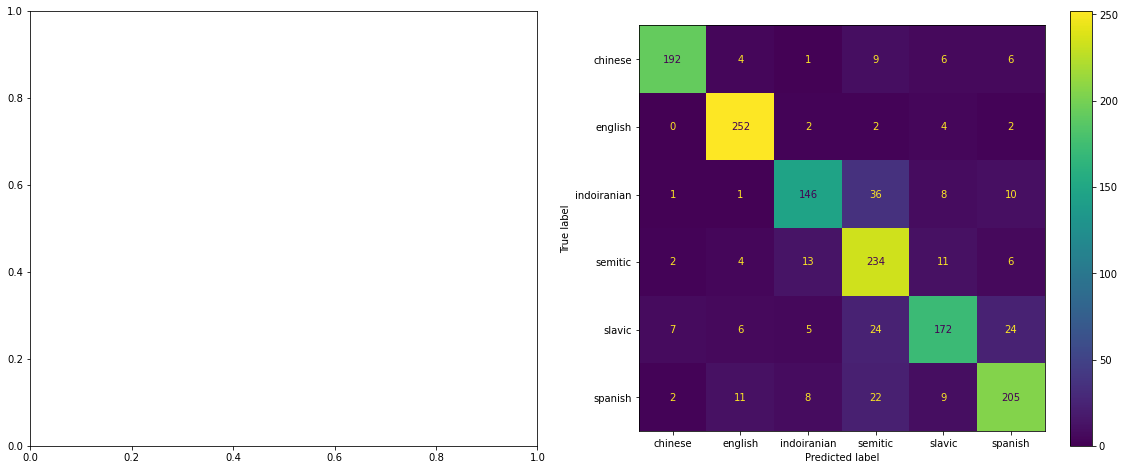

In [49]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))
ConfusionMatrixDisplay.from_predictions(test_dataset['labels'], prediction_labels, display_labels=list(idx_to_label.values()), ax=axes[1])

–¢–∞–±–ª–∏—Ü–∞ –º–µ—Ç—Ä–∏–∫ –ø–æ –∫–ª–∞—Å—Å–∞–º –Ω–∞ eval —Å–µ—Ç–µ.

In [50]:
print(classification_report(test_dataset['labels'], prediction_labels, target_names=list(idx_to_label.values())))

              precision    recall  f1-score   support

     chinese       0.94      0.88      0.91       218
     english       0.91      0.96      0.93       262
 indoiranian       0.83      0.72      0.77       202
     semitic       0.72      0.87      0.78       270
      slavic       0.82      0.72      0.77       238
     spanish       0.81      0.80      0.80       257

    accuracy                           0.83      1447
   macro avg       0.84      0.83      0.83      1447
weighted avg       0.83      0.83      0.83      1447



In [51]:
predictions = trainer.predict(eval_dataset)
prediction_labels = np.argmax(predictions.predictions, axis=-1)

/home/thp/.local/lib/python3.10/site-packages/datasets/load.py:769: FutureWarning: The repository for precision contains custom code which must be executed to correctly load the metric. You can inspect the repository content at https://raw.githubusercontent.com/huggingface/datasets/main/metrics/precision/precision.py
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this metric from the next major release of `datasets`.
  warnings.warn(
/home/thp/.local/lib/python3.10/site-packages/datasets/load.py:769: FutureWarning: The repository for recall contains custom code which must be executed to correctly load the metric. You can inspect the repository content at https://raw.githubusercontent.com/huggingface/datasets/main/metrics/recall/recall.py
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this me

Confusion Matrix –Ω–∞ eval —Å–µ—Ç–µ.

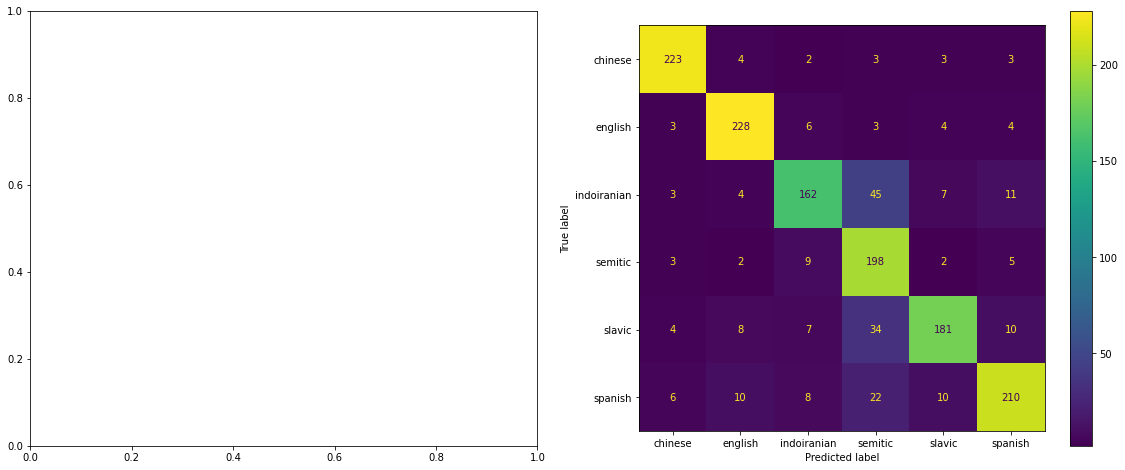

In [52]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))
ConfusionMatrixDisplay.from_predictions(eval_dataset['labels'], prediction_labels, display_labels=list(idx_to_label.values()), ax=axes[1])

–¢–∞–±–ª–∏—Ü–∞ –º–µ—Ç—Ä–∏–∫ –ø–æ –∫–ª–∞—Å—Å–∞–º –Ω–∞ eval —Å–µ—Ç–µ.

In [53]:
print(classification_report(eval_dataset['labels'], prediction_labels, target_names=list(idx_to_label.values())))

              precision    recall  f1-score   support

     chinese       0.92      0.94      0.93       238
     english       0.89      0.92      0.90       248
 indoiranian       0.84      0.70      0.76       232
     semitic       0.65      0.90      0.76       219
      slavic       0.87      0.74      0.80       244
     spanish       0.86      0.79      0.83       266

    accuracy                           0.83      1447
   macro avg       0.84      0.83      0.83      1447
weighted avg       0.84      0.83      0.83      1447



In [54]:
predictions = trainer.predict(test_dataset_2)
prediction_labels = np.argmax(predictions.predictions, axis=-1)

/home/thp/.local/lib/python3.10/site-packages/datasets/load.py:769: FutureWarning: The repository for precision contains custom code which must be executed to correctly load the metric. You can inspect the repository content at https://raw.githubusercontent.com/huggingface/datasets/main/metrics/precision/precision.py
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this metric from the next major release of `datasets`.
  warnings.warn(
/home/thp/.local/lib/python3.10/site-packages/datasets/load.py:769: FutureWarning: The repository for recall contains custom code which must be executed to correctly load the metric. You can inspect the repository content at https://raw.githubusercontent.com/huggingface/datasets/main/metrics/recall/recall.py
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this me

Confusion Matrix –Ω–∞ –∞–ª—å—Ç–µ—Ä–Ω–∞—Ç–∏–≤–Ω–æ–º —Å–µ—Ç–µ.

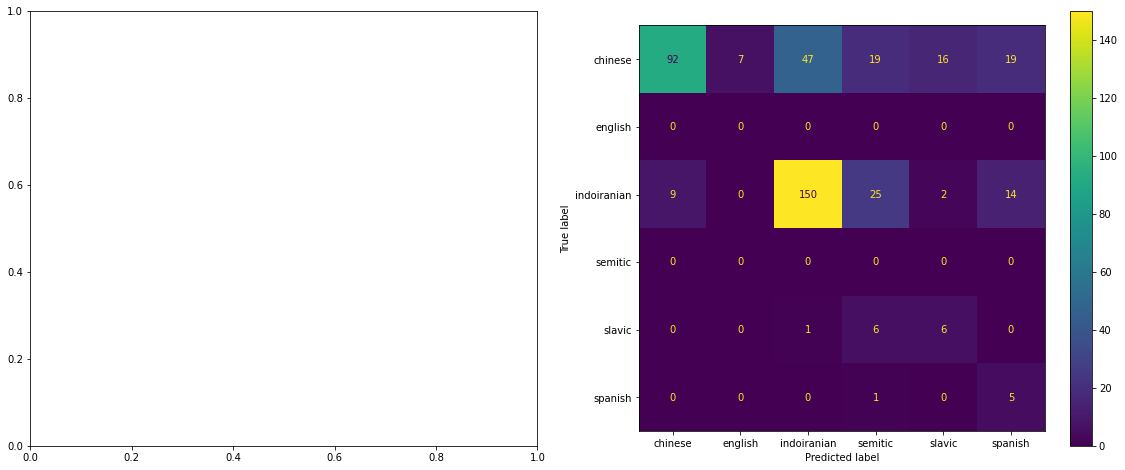

In [55]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))
ConfusionMatrixDisplay.from_predictions(test_dataset_2['labels'], prediction_labels, display_labels=list(idx_to_label.values()), ax=axes[1])

–¢–∞–±–ª–∏—Ü–∞ –º–µ—Ç—Ä–∏–∫ –ø–æ –∫–ª–∞—Å—Å–∞–º –Ω–∞ –∞–ª—å—Ç–µ—Ä–Ω–∞—Ç–∏–≤–Ω–æ–º —Å–µ—Ç–µ.

In [56]:
print(classification_report(test_dataset_2['labels'], prediction_labels, target_names=list(idx_to_label.values())))

              precision    recall  f1-score   support

     chinese       0.91      0.46      0.61       200
     english       0.00      0.00      0.00         0
 indoiranian       0.76      0.75      0.75       200
     semitic       0.00      0.00      0.00         0
      slavic       0.25      0.46      0.32        13
     spanish       0.13      0.83      0.23         6

    accuracy                           0.60       419
   macro avg       0.34      0.42      0.32       419
weighted avg       0.81      0.60      0.66       419



/home/thp/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/thp/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/thp/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
test_dataset_2.push_to_hub("TheHolyPacman/test_dataset_2_mod")

Uploading the dataset shards:   0%|          | 0/1 [00:00<?, ?it/s]

Creating parquet from Arrow format:   0%|          | 0/1 [00:00<?, ?ba/s]